This notebook generates images with @gfodor's pixel art LoRAs

In [1]:
# model_id = "segmind/SSD-1B"
model_id = "segmind/Segmind-Vega"

In [2]:
# adapter_id = "gfodor/bigp1xart-ssd-1b-flat-256x256"
# adapter_id = "gfodor/bigp1xart-ssd-1b-detailed-256x256"
adapter_id = "gfodor/bigp1xart-vega-detailed-256x256"
# adapter_id = "gfodor/bigp1xart-vega-flat-256x256"

In [3]:
import torch
from diffusers import LCMScheduler, AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(model_id)
pipe.to("cuda")

pipe.load_lora_weights(adapter_id)
pipe.fuse_lora()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

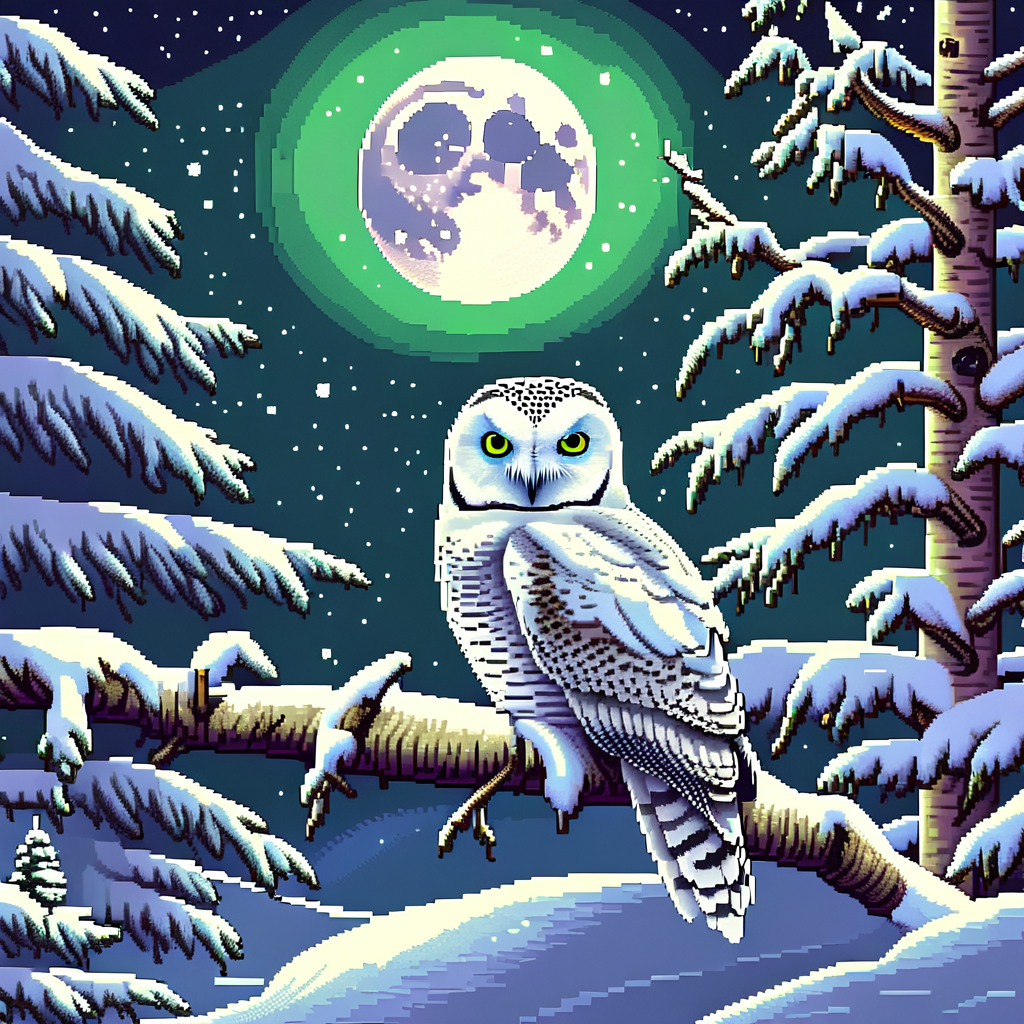

In [4]:
prompt = "bigp1xart A snowy nighttime landscape illuminated by a bright full moon and green auroras in the sky. A snowy owl is perched prominently on a bare birch limb in the foreground, with its distinctive white and gray plumage blending into the wintry scene. In the background, snow-covered coniferous trees."

image = pipe(prompt=prompt, num_inference_steps=60, guidance_scale=5).images[0]
image